## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy.stats import zscore

from lazypredict.Supervised import LazyRegressor

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

from imblearn.over_sampling import SMOTE

## Load dataset

In [4]:
# Load the dataset
credit_df=pd.read_csv("data\\german_credit.csv")
pd.set_option('display.max_columns', None)
credit_df.head(10)

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2
5,1,1,10,4,0,2241,1,2,1,3,1,3,1,48,3,1,2,2,2,1,2
6,1,1,8,4,0,3398,1,4,1,3,1,4,1,39,3,2,2,2,1,1,2
7,1,1,6,4,0,1361,1,2,2,3,1,4,1,40,3,2,1,2,2,1,2
8,1,4,18,4,3,1098,1,1,4,2,1,4,3,65,3,2,2,1,1,1,1
9,1,2,24,2,3,3758,3,1,1,2,1,4,4,23,3,1,1,1,1,1,1


## Data info

In [81]:

credit_df.shape

(500, 22)

In [82]:
credit_df.columns

Index(['Unnamed: 0', 'Creditability', 'Account.Balance',
       'Duration.of.Credit..month.', 'Payment.Status.of.Previous.Credit',
       'Purpose', 'Credit.Amount', 'Value.Savings.Stocks',
       'Length.of.current.employment', 'Instalment.per.cent',
       'Sex...Marital.Status', 'Guarantors', 'Duration.in.Current.address',
       'Most.valuable.available.asset', 'Age..years.', 'Concurrent.Credits',
       'Type.of.apartment', 'No.of.Credits.at.this.Bank', 'Occupation',
       'No.of.dependents', 'Telephone', 'Foreign.Worker'],
      dtype='object')

In [83]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Unnamed: 0                         500 non-null    int64
 1   Creditability                      500 non-null    int64
 2   Account.Balance                    500 non-null    int64
 3   Duration.of.Credit..month.         500 non-null    int64
 4   Payment.Status.of.Previous.Credit  500 non-null    int64
 5   Purpose                            500 non-null    int64
 6   Credit.Amount                      500 non-null    int64
 7   Value.Savings.Stocks               500 non-null    int64
 8   Length.of.current.employment       500 non-null    int64
 9   Instalment.per.cent                500 non-null    int64
 10  Sex...Marital.Status               500 non-null    int64
 11  Guarantors                         500 non-null    int64
 12  Duration.in.Current.ad

In [84]:
# check for null values
credit_df.isnull().sum()

Unnamed: 0                           0
Creditability                        0
Account.Balance                      0
Duration.of.Credit..month.           0
Payment.Status.of.Previous.Credit    0
Purpose                              0
Credit.Amount                        0
Value.Savings.Stocks                 0
Length.of.current.employment         0
Instalment.per.cent                  0
Sex...Marital.Status                 0
Guarantors                           0
Duration.in.Current.address          0
Most.valuable.available.asset        0
Age..years.                          0
Concurrent.Credits                   0
Type.of.apartment                    0
No.of.Credits.at.this.Bank           0
Occupation                           0
No.of.dependents                     0
Telephone                            0
Foreign.Worker                       0
dtype: int64

In [85]:
# see the statistical analysis of the dataset
credit_df.describe()

,Unnamed: 0,Creditability,Account.Balance,Duration.of.Credit..month.,Payment.Status.of.Previous.Credit,Purpose,Credit.Amount,Value.Savings.Stocks,Length.of.current.employment,Instalment.per.cent,Sex...Marital.Status,Guarantors,Duration.in.Current.address,Most.valuable.available.asset,Age..years.,Concurrent.Credits,Type.of.apartment,No.of.Credits.at.this.Bank,Occupation,No.of.dependents,Telephone,Foreign.Worker
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0,500.000000,500.000000,500.000000
mean,490.682000,0.714000,2.246000,21.552000,2.336000,2.988000,3242.096000,1.874000,2.454000,2.992000,1.746000,1.088000,2.832000,2.378000,35.458000,1.836000,1.930000,1.360000,1.0,1.144000,1.398000,1.034000
std,290.249214,0.452342,0.806713,12.321645,0.609793,0.974554,2841.763537,1.198749,1.090992,1.118229,0.624712,0.283579,1.100089,1.057048,11.419152,0.370646,0.534482,0.480481,0.0,0.351441,0.489976,0.181411
min,1.000000,0.000000,1.000000,4.000000,1.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000
25%,230.750000,0.000000,2.000000,12.000000,2.000000,2.000000,1360.750000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,27.000000,2.000000,2.000000,1.000000,1.0,1.000000,1.000000,1.000000
50%,489.000000,1.000000,2.000000,18.000000,2.000000,3.000000,2243.500000,1.000000,2.000000,3.000000,2.000000,1.000000,3.000000,3.000000,33.000000,2.000000,2.000000,1.000000,1.0,1.000000,1.000000,1.000000
75%,739.500000,1.000000,3.000000,24.000000,3.000000,4.000000,3983.500000,3.000000,3.000000,4.000000,2.000000,1.000000,4.000000,3.000000,41.000000,2.000000,2.000000,2.000000,1.0,1.000000,2.000000,1.000000
max,999.000000,1.000000,3.000000,60.000000,3.000000,4.000000,18424.000000,4.000000,4.000000,4.000000,3.000000,2.000000,4.000000,4.000000,75.000000,2.000000,3.000000,2.000000,1.0,2.000000,2.000000,2.000000


## Data Visualization

Frequency distribution in each columns 

In [86]:
# def plot_bar_graph(column_name):
#     ed_count = column_name.value_counts()
#     sns.set_theme(style="darkgrid")
#     sns.barplot(x =ed_count.index,y = ed_count.values, alpha=0.9)
#     plt.title('Frequency Distribution of {} Levels using Bar Plot'.format(column_name.name))
#     plt.ylabel('Number of Occurrences', fontsize=12)
#     plt.xlabel('{}'.format(column_name.name), fontsize=12)
#     plt.show()

# for i in credit_df.columns:
#   plot_bar_graph(credit_df[i])  

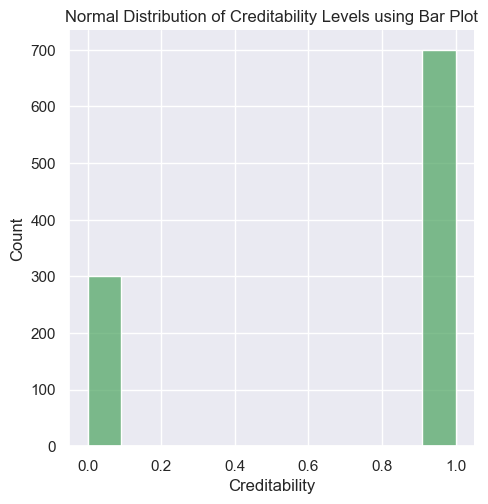

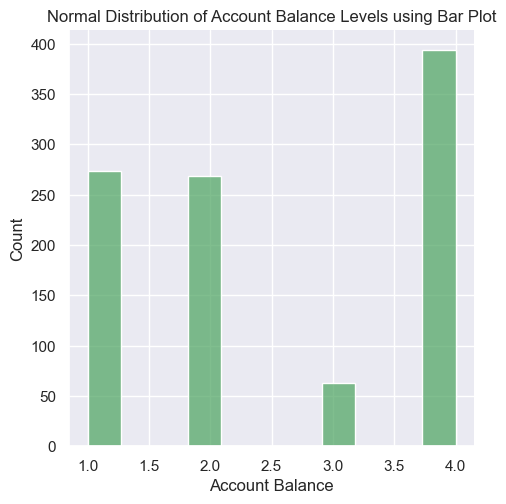

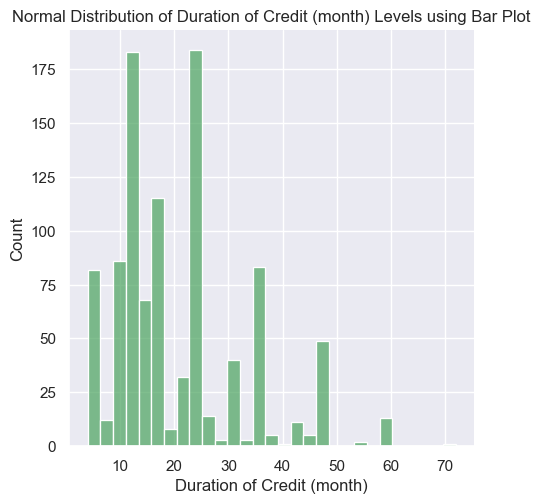

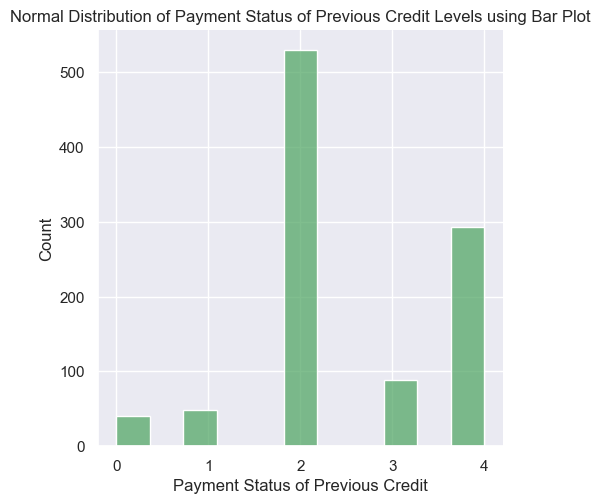

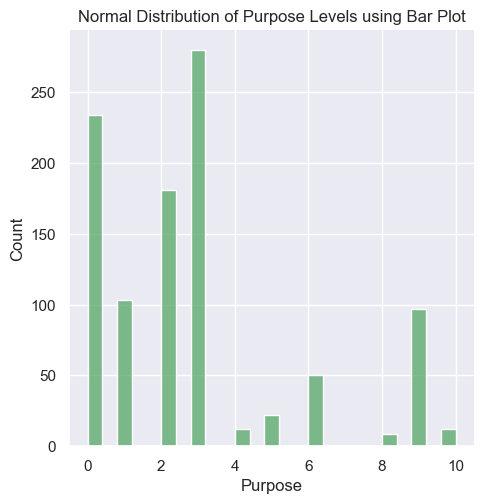

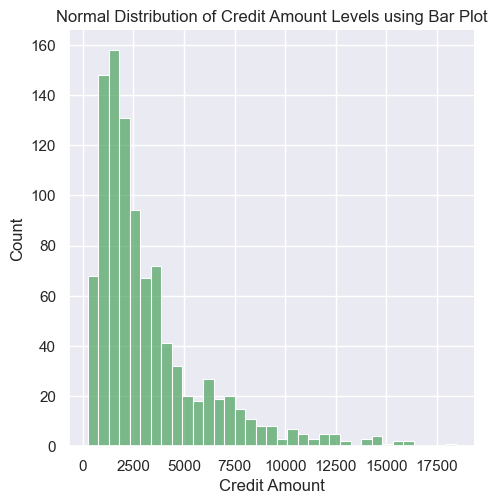

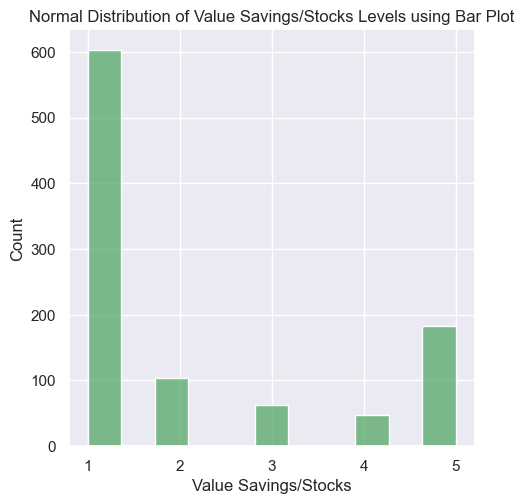

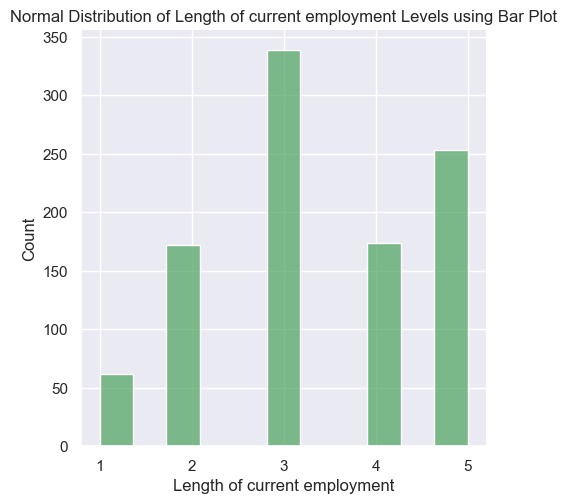

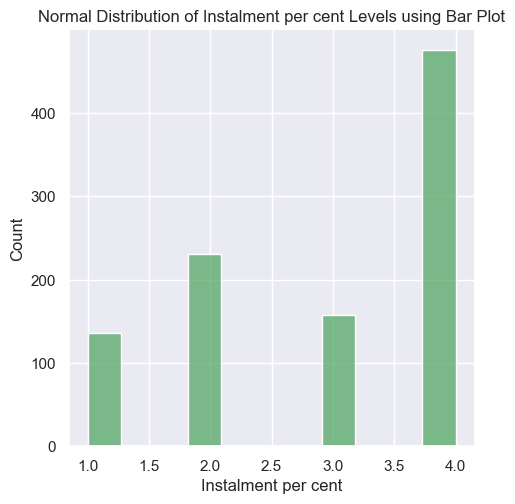

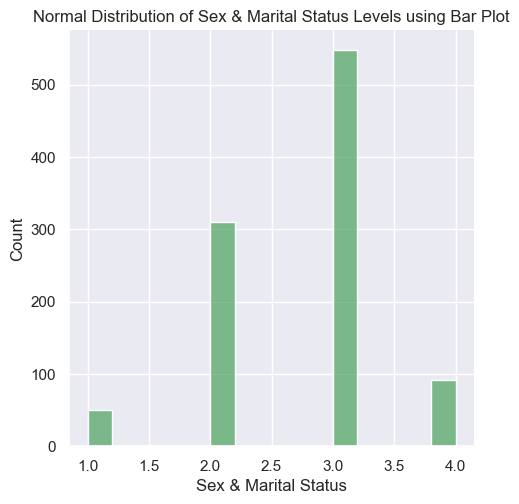

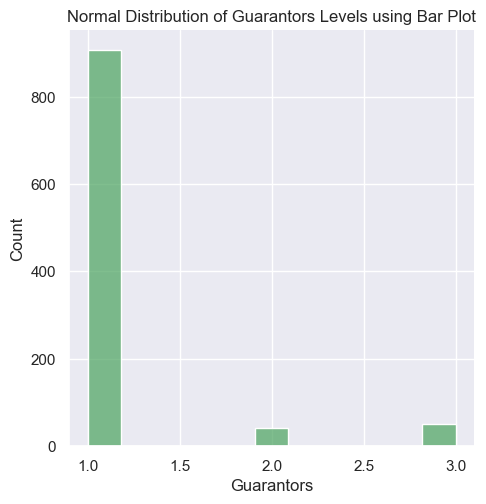

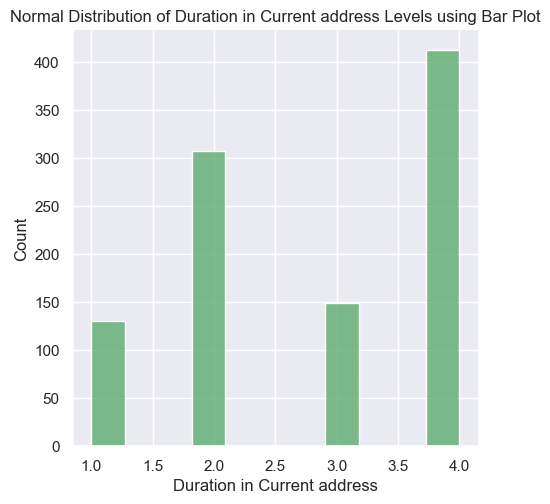

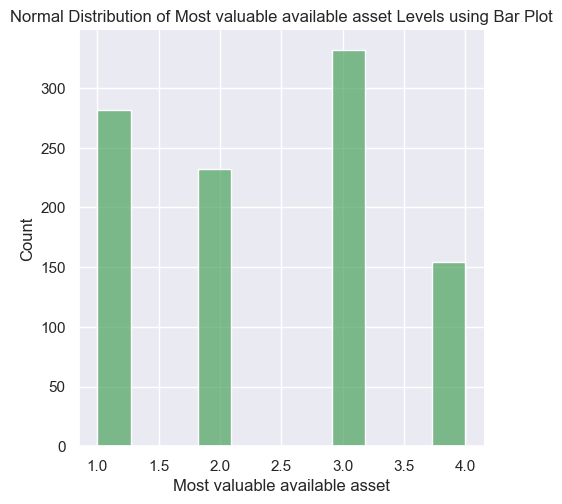

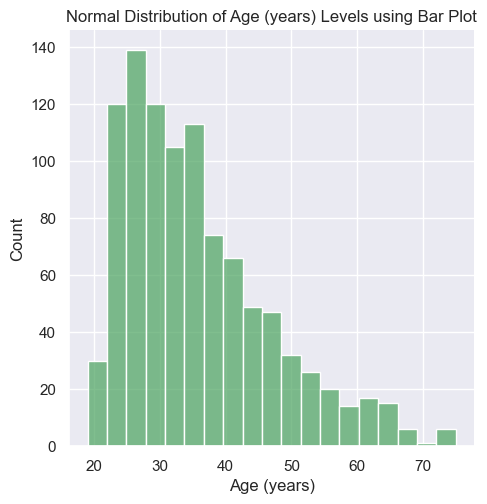

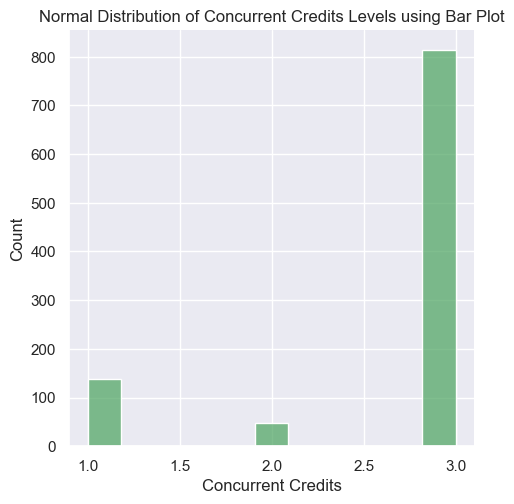

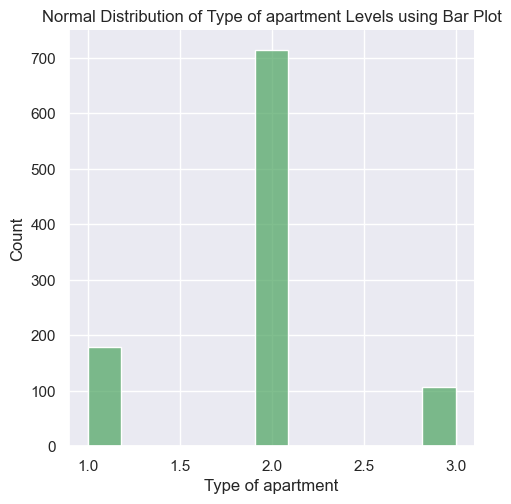

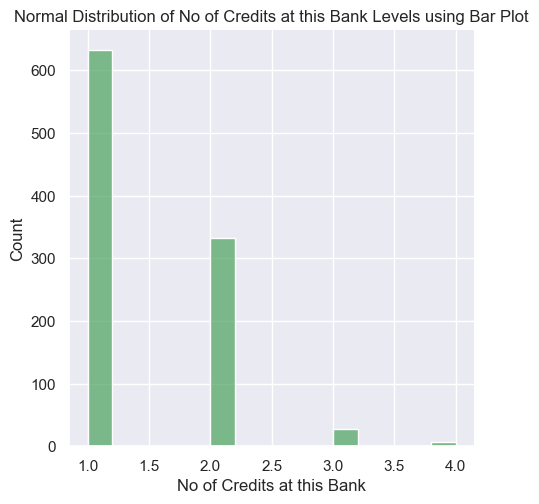

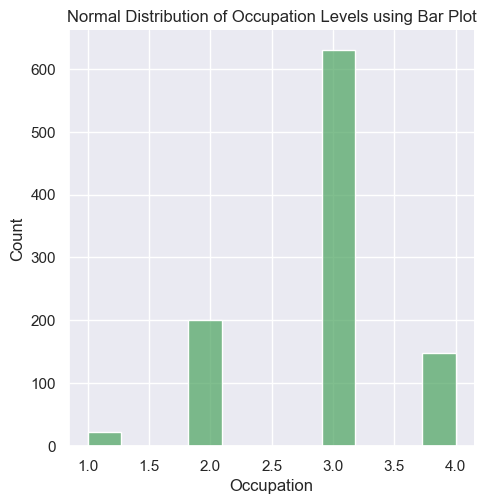

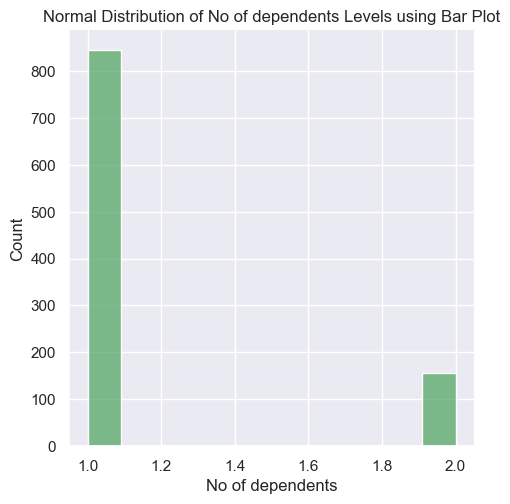

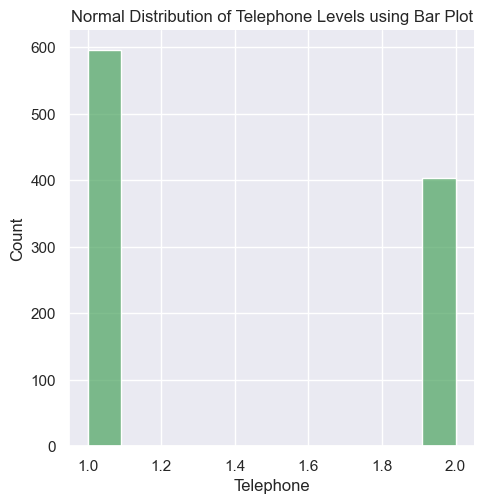

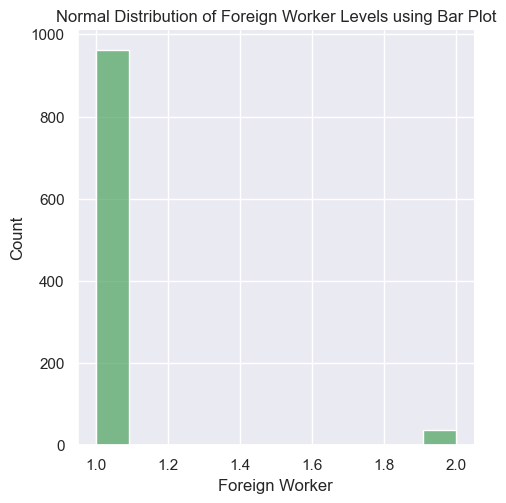

In [91]:
def distplot_graph(column_name):
    sns.set_theme(style="darkgrid")
    sns.displot(credit_df[column_name], color="g")
    plt.title('Normal Distribution of {} Levels using Bar Plot'.format(column_name))    
    plt.xlabel('{}'.format(column_name), fontsize=12)
    plt.show() 
    
for col in credit_df.columns:
  distplot_graph(col)

In [95]:
training_df=pd.read_csv("data\\Training50.csv")
training_df.head(10)

,Unnamed: 0,Creditability,Account.Balance,Duration.of.Credit..month.,Payment.Status.of.Previous.Credit,Purpose,Credit.Amount,Value.Savings.Stocks,Length.of.current.employment,Instalment.per.cent,Sex...Marital.Status,Guarantors,Duration.in.Current.address,Most.valuable.available.asset,Age..years.,Concurrent.Credits,Type.of.apartment,No.of.Credits.at.this.Bank,Occupation,No.of.dependents,Telephone,Foreign.Worker
0,497,1,3,6,2,3,2108,1,3,2,3,1,2,1,29,2,1,1,1,1,1,1
1,756,0,1,15,1,4,950,1,4,4,2,1,3,3,33,2,1,2,1,2,1,1
2,580,0,1,42,2,3,7174,4,3,4,1,1,3,3,30,2,2,1,1,1,2,1
3,833,0,3,36,3,4,7980,4,1,4,2,1,4,3,27,2,1,2,1,1,2,1
4,602,1,3,24,3,2,2028,1,3,2,2,1,2,2,30,2,2,2,1,1,1,1
5,734,1,1,15,2,4,2511,1,1,1,1,1,4,3,23,2,1,1,1,1,1,1
6,303,1,3,24,2,2,3749,1,1,2,1,1,4,3,26,2,2,1,1,1,1,1
7,923,0,1,24,2,4,1442,1,3,4,1,1,4,3,23,2,1,2,1,1,1,1
8,677,1,1,9,3,3,1138,1,2,4,2,1,4,1,25,2,2,2,1,1,1,1
9,124,1,3,15,3,3,1459,1,2,4,1,1,2,3,43,2,2,1,1,1,1,1


In [107]:
training_df_row = training_df[training_df["Unnamed: 0"] == 756]

In [108]:
training_df_2 = training_df_row.drop(columns=['Unnamed: 0','Occupation'])
credit_df_2 = credit_df.drop(columns=['Occupation'])

In [109]:
is_sample_by_index = set(training_df_2.index).issubset(set(credit_df_2.index))
print("Is sample_df a sample of original_df by index? ", is_sample_by_index)
print(training_df_2.index)

Is sample_df a sample of original_df by index?  True
Index([1], dtype='int64')


In [97]:
is_sample = training_df_2.isin(credit_df_2.to_dict(orient='list')).all().all()
print("Is sample_df a sample of original_df? ", is_sample)

Is sample_df a sample of original_df?  False


## Data processing

### outlier detection

In [9]:
# Identify outliers using Z-score
z_scores = np.abs(zscore(credit_df))
outliers = (z_scores > 3).any(axis=1)
print("Outliers detected:\n", credit_df[outliers])


Outliers detected:
      Creditability  Account Balance  Duration of Credit (month)  \
3                1                1                          12   
4                1                1                          12   
5                1                1                          10   
6                1                1                           8   
7                1                1                           6   
..             ...              ...                         ...   
977              0                1                           6   
984              0                1                          48   
986              0                1                          14   
991              0                2                          24   
997              0                4                          21   

     Payment Status of Previous Credit  Purpose  Credit Amount  \
3                                    4        0           2122   
4                                    4     

### Data correlation

<Axes: >

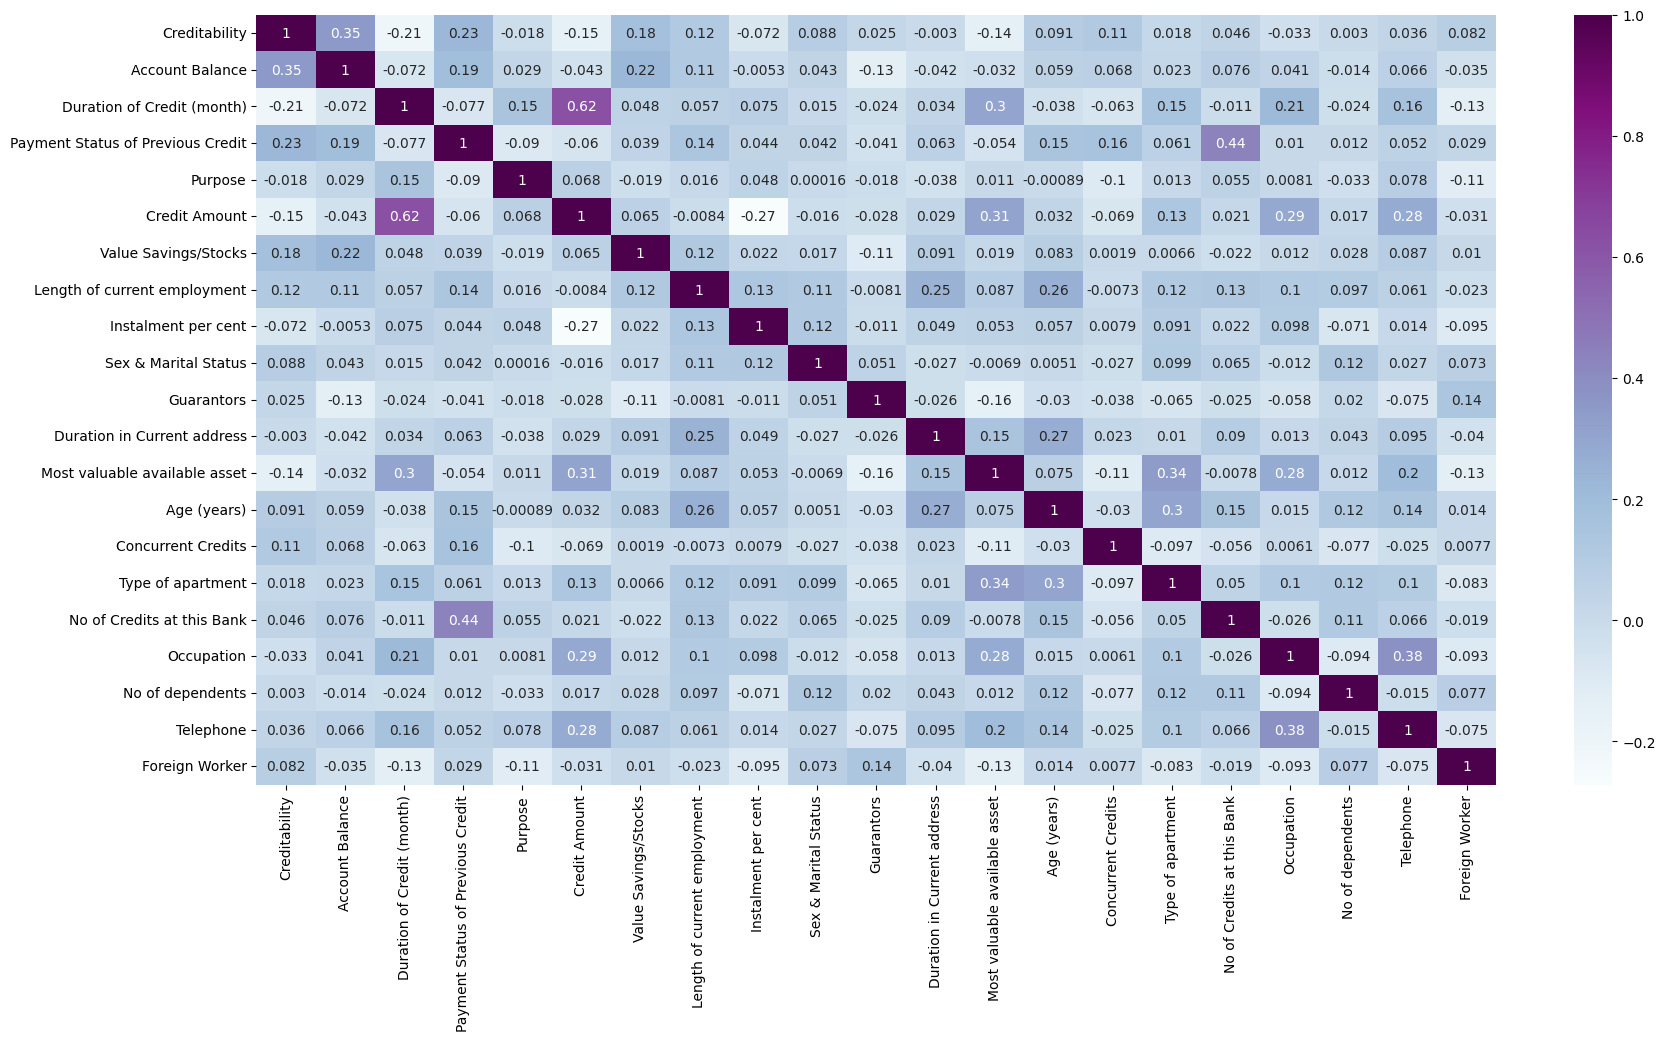

In [6]:
plt.figure(figsize=(20,10))
corn=credit_df.corr()
sns.heatmap(corn,annot=True,cmap="BuPu")

In [1]:

from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaler.fit(credit_df)
scaled_df = scaler.transform(credit_df)
scaled_df.head(10)

NameError: name 'credit_df' is not defined

## Split data

In [23]:
X = credit_df.drop(columns=['Creditability'])
Y = credit_df.pop(item='Creditability')

KeyError: "['Creditability'] not found in axis"

In [24]:
X.head()


,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2


In [15]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Creditability, dtype: int64

In [22]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

# Perform KFold cross-validation
for train_index, test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train, y_test = Y[train_index], Y[test_index]
    

    # Fit and evaluate models
    models, predictions = reg.fit(X_train, X_test, y_train, y_test)

    # Display model performance
    print(models)

100%|██████████| 42/42 [00:07<00:00,  5.45it/s]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 414
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 20
[LightGBM] [Info] Start training from score 0.702500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

100%|██████████| 42/42 [00:06<00:00,  6.68it/s]


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000295 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 416
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 20
[LightGBM] [Info] Start training from score 0.691250
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

100%|██████████| 42/42 [00:05<00:00,  7.08it/s]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 414
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 20
[LightGBM] [Info] Start training from score 0.688750
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

100%|██████████| 42/42 [00:06<00:00,  6.80it/s]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 414
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 20
[LightGBM] [Info] Start training from score 0.720000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

100%|██████████| 42/42 [00:06<00:00,  6.55it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 414
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 20
[LightGBM] [Info] Start training from score 0.697500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [48]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

params = {
    'objective': 'binary',         
    'num_leaves': 32,             
    'max_depth': 5,               
    'learning_rate': 0.1,                            
}


LGBMClf= lgb.LGBMClassifier(**params)

scores = []



# Perform KFold cross-validation
for train_index, test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train, y_test = Y[train_index], Y[test_index]

    LGBMClf.fit(X_train, y_train)


    # Validate the model
    y_pred = LGBMClf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

    print("Wrong classifications:")
    for i in range(len(y_test)):
        if y_test.iloc[i] != y_pred[i]:
            print(f"Index: {i}, Predicted: {y_pred[i]}, Actual: {y_test.iloc[i]}, Data: {X_test.iloc[i].values}")

# Calculate and print the mean and standard deviation of the scores
print("Cross-validation scores: ", scores)
print("Mean CV score: ", np.mean(scores))
print("Standard Deviation of CV scores: ", np.std(scores))



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 628, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 415
[LightGBM] [Info] Number of data points in the train set: 900, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.697778 -> initscore=0.836738
[LightGBM] [Info] Start training from score 0.836738
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b